Saving nba_traditional_stats_2024_2025.csv to nba_traditional_stats_2024_2025.csv
Using file: nba_traditional_stats_2024_2025.csv
Filtered to 312 players for 2024-25 Regular Season
Sample Free Throw Dependency table:


,PLAYER,TEAM,GP,MIN,PTS,FTM,FTA,FT_PCT,FT_Dependency
0,Jimmy Butler III,GSW,55,1746,964,330,392,0.842,34.232365
1,James Harden,LAC,79,2789,1802,505,578,0.874,28.024417
2,Trae Young,ATL,76,2739,1841,491,561,0.875,26.670288
3,Malcolm Brogdon,WAS,24,564,305,81,92,0.880,26.557377
4,Damian Lillard,MIL,58,2093,1447,362,393,0.921,25.017277
5,Mason Plumlee,PHX,74,1300,333,83,128,0.648,24.924925
6,Shai Gilgeous-Alexander,OKC,76,2598,2484,601,669,0.898,24.194847
7,Bennedict Mathurin,IND,72,2149,1156,276,332,0.831,23.875433
8,Deni Avdija,POR,72,2161,1219,290,372,0.780,23.789992
9,Paolo Banchero,ORL,46,1582,1191,280,385,0.727,23.509656


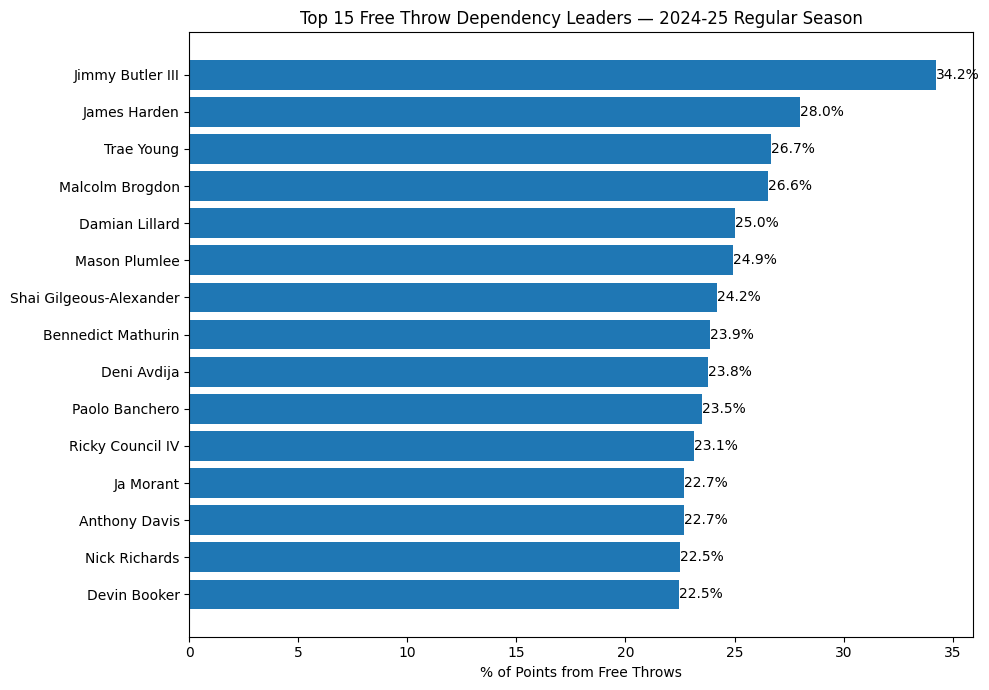


Saved:
- ft_dependency_2024_25.csv (full table)
- leaders_ft_dependency_2024_25.csv (top 15)
- top_ft_dependency_leaders.png


In [1]:
# 🏀 Free Throw Dependency (% of Points from FT) — 2024-25 Regular Season
# ------------------------------------------------------------
# Dataset columns used:
# PLAYER, TEAM, Year, Season Type, GP, MIN, PTS, FTM, FTA, FG_PCT, FG3_PCT, FT_PCT
# ------------------------------------------------------------

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option("display.max_rows", 50)
pd.set_option("display.max_columns", None)

# ================================
# 1) Load CSV (Colab or Local)
# ================================
try:
    from google.colab import files
    uploaded = files.upload()
    file_path = list(uploaded.keys())[0]
except:
    file_path = "nba_traditional_stats_2024_2025.csv"   # <-- replace if running locally

print("Using file:", file_path)
df = pd.read_csv(file_path)
df.columns = [c.strip() for c in df.columns]

# Clean Season Type text
if "Season Type" in df.columns:
    df["Season Type"] = df["Season Type"].astype(str).str.replace("%20", " ", regex=False)

# Ensure numeric
num_cols = ["GP","MIN","PTS","FTM","FTA","FG_PCT","FG3_PCT","FT_PCT"]
for c in num_cols:
    if c in df.columns:
        df[c] = pd.to_numeric(df[c], errors="coerce")

# ================================
# 2) Filter to 2024-25 Regular Season
# ================================
df_use = df[(df["Year"] == "2024-25") &
            (df["Season Type"].str.lower() == "regular season")].copy()

# Minimum filters
MIN_GP = 20
MIN_MINUTES = 300
MIN_POINTS = 300

df_use = df_use[(df_use["GP"] >= MIN_GP) &
                (df_use["MIN"] >= MIN_MINUTES) &
                (df_use["PTS"] >= MIN_POINTS)].copy()

print(f"Filtered to {len(df_use)} players for 2024-25 Regular Season")

# ================================
# 3) Compute Free Throw Dependency
# ================================
df_use["FT_Dependency"] = np.where(df_use["PTS"] > 0, (df_use["FTM"] / df_use["PTS"]) * 100, np.nan)

cols_out = ["PLAYER","TEAM","GP","MIN","PTS","FTM","FTA","FT_PCT","FT_Dependency"]
ft_dependency_tbl = (df_use[cols_out]
                     .sort_values("FT_Dependency", ascending=False)
                     .reset_index(drop=True))

print("Sample Free Throw Dependency table:")
display(ft_dependency_tbl.head(10))

# ================================
# 4) Leaderboard Plot
# ================================
TOPN = 15
leaders = ft_dependency_tbl.head(TOPN)

plt.figure(figsize=(10, 7))
plt.barh(leaders["PLAYER"][::-1], leaders["FT_Dependency"][::-1])
for i, v in enumerate(leaders["FT_Dependency"][::-1]):
    plt.text(v, i, f"{v:.1f}%", va="center", ha="left")
plt.xlabel("% of Points from Free Throws")
plt.title(f"Top {TOPN} Free Throw Dependency Leaders — 2024-25 Regular Season")
plt.tight_layout()
plt.savefig("top_ft_dependency_leaders.png", dpi=300)
plt.show()

# ================================
# 5) Save Outputs
# ================================
ft_dependency_tbl.to_csv("ft_dependency_2024_25.csv", index=False)
leaders.to_csv("leaders_ft_dependency_2024_25.csv", index=False)

print("\nSaved:")
print("- ft_dependency_2024_25.csv (full table)")
print("- leaders_ft_dependency_2024_25.csv (top 15)")
print("- top_ft_dependency_leaders.png")